###### Learing and Mining on Large Networks 
###### Homework 
###### 2020/9/22
###### Masahiro Kiji

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
g = nx.read_edgelist("Wiki-Vote.txt",create_using=nx.DiGraph(), nodetype = int)

In [3]:
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 7115\nNumber of edges: 103689\nAverage in degree:  14.5733\nAverage out degree:  14.5733'

### Q1.1

In [4]:
lst1 = []
lst2 = []
for i in g.nodes:
    o_deg = g.out_degree(i)
    if o_deg in lst1:
        idx = lst1.index(o_deg)
        lst2[idx] +=1
    else:
        lst1.append(o_deg)
        lst2.append(1)
        
if 0 in lst1:        
    idx = lst1.index(0)
    lst1.remove(0)
    lst2.pop(idx)

In [5]:
lst1 = np.log10(np.array(lst1))
lst2 = np.log10(np.array(lst2))

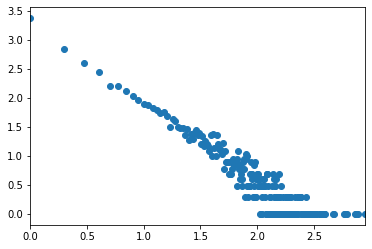

In [6]:
plt.figure()
plt.xlim([np.min(lst1), np.max(lst1)])
plt.scatter(lst1,lst2)

### Q1.2

In [7]:
A = np.ones(len(lst1))

In [8]:
A = np.c_[A,lst1]

In [9]:
A_t=np.transpose(A)

In [10]:
coeff = A_t@lst2@np.linalg.inv(A_t@A)
coeff

array([ 3.1324547 , -1.28106471])

Therefore $a=-1.28, b=3.13$

(0.0, 2.9508514588885464)

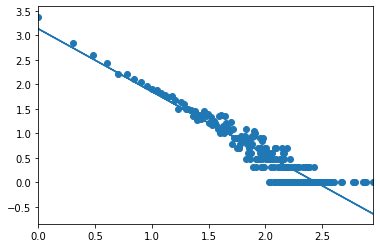

In [11]:
plt.figure()
plt.scatter(lst1,lst2)
plt.plot(lst1,coeff[1]*lst1+coeff[0])
# plt.ylim([0,3.5])
plt.xlim([np.min(lst2),np.max(lst1)])

### Q2.1
In Cayley tree, the number of nodes in the $d$th ring is given by $N_d = k(k-1)^{d-1}$ for $d>0$

Therefore, the number of nodes reachable in $d$ steps from the central node is $\sum_{i=1}^{d}k(k-1)^{i-1} = \frac{k((k-1)^d-1)}{k-2}$ (excluding the central node)

### Q2.2
From the assumptions, we can compute the number of rings in terms of $n$ and $k$. 
We can see $N_d$ as a geometric progression with $a=k$ and $r=k-1$. Therefore, the sum $\sum_{i=1}^{d}k(k-1)^{i-1}$
$=\frac{k((k-1)^d-1)}{k-2}$, but the central node is not included so $n=1+\frac{k((k-1)^d-1)}{k-2}$.

We can solve the equation in terms of $d$ so $n=1+\frac{k((k-1)^d-1)}{k-2} \Leftrightarrow (n-1)(k-2)=k((k-1)^d-1) \Leftrightarrow \frac{(n-1)(k-2)}{k}+1 = (k-1)^d$. Taking the natural log both sides give use $\ln{((n-1)(k-2)+k)}-\ln{k} = d\ln(k-1)$ Therefore, $d=\frac{\ln{((n-1)(k-2)+k)}-\ln{k}}{\ln(k-1)}$. Since the maximum shortest path is a path from a node in the outermost ring to another node in the outermost ring such that the path has to pass the central node, the diameter is $2d = 2*\frac{\ln{((n-1)(k-2)+k)}-\ln{k}}{\ln(k-1)}$.

### Q2.3
As the diameter can be written in terms of $ln(n) \because Q2.2$ and as you can see in the plot, the diameter will grow as $log(n)$, we can say that the k-Cayley trees are "small world". 

### Q2.4
It is searchable since this graph has a tree structure and greedy geographic routing always gives the shortest path between two nodes and since the diameter=maximum shortest path can be expressed in the form of $\ln(n) \because Q2.2$

In [12]:
def cayley_tree(k=3, ring=2):
    val = 0
    for i in range(1,ring+1):
        val+=k*(k-1)**(i-1)
    return val+1
def cayley_tree2(k=3, ring=2):
    return 1+(k*((k-1)**ring-1))/(k-2)
def diameter(n,k):
    num = np.log((n-1)*(k-2)+k)-np.log(k)
    denom = np.log(k-1)
    return 2*num/denom

In [13]:
for i in range(10):
    print(cayley_tree(3,i),cayley_tree2(3,i))


1 1.0
4 4.0
10 10.0
22 22.0
46 46.0
94 94.0
190 190.0
382 382.0
766 766.0
1534 1534.0


In [14]:
d_ls = []
for i in range(1,1000):
    d_ls.append(diameter(i,3))


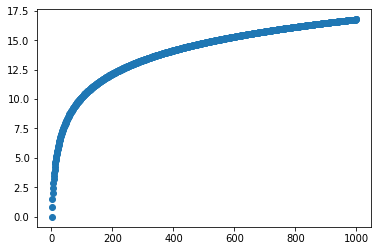

In [15]:
plt.figure()
plt.scatter(range(1,1000),d_ls)

### Q3.1
For each vertex in the graph, the number of two other vertices to form a triangle is ${n-1}\choose{2}$...$(1)$, and each triangle will appear with probability $\frac{c}{{n-1}\choose{2}} ...(2)$. Then the vertex will get $2$ edges for each triangle formation. Therefore the expected degree in this model is $(1)*(2)*2 = 2c$

### Q3.2
First we can think about the distribution of having $t$ triangles. This is binomial distribution with $n=$${n-1}\choose2$ and $p=\frac{c}{{n-1}\choose{2}}$. Then by the Poisson Limit Theorem, $\lim_{n\rightarrow \infty}f(t)=\frac{e^{-c}*c^{t}}{t!}$, where $f(t)$ is the probability mass function of Binomial($n=$$n-1\choose2$,$p=\frac{c}{{n-1}\choose{2}}$) $\because n$ is very large. Again, the degree is $2$ for each triangle so $t=\frac{k}{2}$ and $p(k)=\frac{e^{-c}c^{k/2}}{(\frac{k}{2})!}$ as long as $k$ is even. Since $t$ is an non-negative interger, $k$ cannot be odd so $p(k)=0$ when $k$ is odd. 

### Q3.3
We can think of $C_n$ in with respect to triangles around a vertex. From question $3.1$ we know that on average, there are $c$ triangles around each vertex. The total number of triangles in the network is $nc/3$ since the number of triangle is counted for each vertex forming the triangle. From the vertex's point of view, $nc$ = the number of triangles * 3(edges or vertices for each triangle).

Then the number of connected triples around a vertex of degree $k$ is $2t \choose 2$$=t(2t-1)$ because $k=2t$. And the number of vertices with $t$ triangles can be computed by $n*f(t)$. Therefore, the total number of connected triples is $\sum_{all\,t}t(2t-1)*n*f(t)=ne^{-c}\sum_{t=0}^{\infty}t(2t-1)\frac{c^t}{t!} = ne^{-c}(2c^2+c)e^c = nc(2c+1)$ $\because \sum_{k=0}^{\infty}k\frac{z^k}{k!}=ze^z$ and $\sum_{k=0}^{\infty}k^2\frac{z^k}{k!}=(z+z^2)e^z$

Now the clustering coefficient can be found by the number of triangles*$3$/(the number of connected triples)so it is $\frac{nc}{nc(2c+1)}=\frac{1}{2c+1}$. Therefore, whether $n$ goes to infinity does not matter (still $\frac{1}{2c+1}$)  


### Q3.4
There are two cases in which a vertex is not in the giant component. The first case is that the vertex does not form triangles with each of $n-1 \choose 2$ pairs.The second case is that the pair form a triangle with the vertex, but none of the pair is in the giant component. The probability that the vertex does not form a triangle is $1-p$, and the probability that the pair form a triangle, but none of the pair is in the giant component is $p*q^2$ where $q$ is the probability that a vertex is not in the giant component. Therefore, we can contruct the equation $q=(1-p+pq^2)^{n-1\choose2} \Leftrightarrow q=(1-\frac{c}{n-1\choose2}+\frac{cu^2}{n-1\choose2})^{n-1 \choose 2}$. Then $lim_{n \rightarrow \infty}(1-\frac{c}{n-1\choose2}+\frac{cu^2}{n-1\choose2})^{n-1 \choose 2} = e^{c(q^2-1)}=e^{-c(1-q^2)}$. Finally, $S=1-q=1-e^{-c(1-q^2)}=1-e^{-c(1-(1-S)^2)}=1-e^{-cS(2-S)}$ 

Also, this has non-zero solution for $c>0.5$ so a phase transiion would be (a GCC exists) when $p>1/((n-1)(n-2)) \because p = \frac{c}{n-1 \choose 2}$.

### Q3.5
Since the giant component fills half of the network, $S=1/2$. Then solving $S=1-e^{-cS(2-S)}$ in terms of $c$ gives us $c=ln(1-S)/-S(2-S)$. By setting $S=1/2$, we get $c=0.924$. By setting $c=0.924$ in the answer of $3.3$, we get $1/(2*0.924+1)=0.351$

In [16]:
np.log(0.5)/(-0.5*1.5)

0.9241962407465937

In [17]:
1/(2*0.924+1)

0.351123595505618

### Q4.1

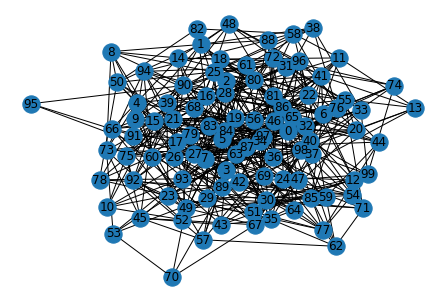

In [57]:
G_er = nx.erdos_renyi_graph(100,0.1)
G_er_ACC = G_er.copy()
G_er_RAND = G_er.copy()
nx.draw(G_er_RAND, with_labels=True)
plt.show()

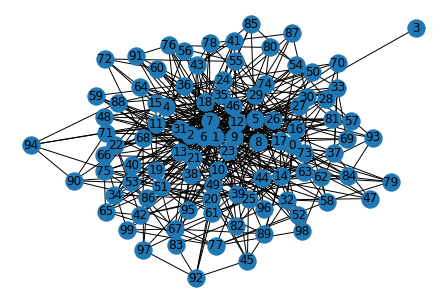

In [58]:
G_pl = nx.barabasi_albert_graph(100,5)
G_pl_ACC = G_pl.copy()
G_pl_RAND = G_pl.copy()
nx.draw(G_pl, with_labels=True)
plt.show()

### Q4.2

In [59]:

# list(G_er.edges)

def sis_on_graph(edges, beta=0.2, delta=0.2, max_time=500):
    vertex = []
    for edge in edges:
        if edge[0] not in vertex:
            vertex.append(edge[0])
        if edge[1] not in vertex:
            vertex.append(edge[1])
    vec = {i : 1 for i in vertex}
    new_vec = {i : 1 for i in vertex}
    num_infected = []
    num_infected.append(sum(vec.values()))
    for x in range(max_time):
        for i in vertex:
            if vec[i] == 1 and np.random.rand() <= delta:
                new_vec[i]=0
            for edge in edges:
                if i == edge[0] and vec[i]==1 and vec[edge[1]]==0:
                    if np.random.rand() <= beta:
                        new_vec[edge[1]]=1
                elif i == edge[1] and vec[i]==1 and vec[edge[0]]==0:
                    if np.random.rand() <= beta:
                        new_vec[edge[0]]=1
        vec = new_vec.copy()
        num_infected.append(sum(vec.values()))
    return num_infected

### Q4.3

In [60]:
def ACC(edges, k=10):
    choosen =[]
    vertex = []
    for edge in edges:
        if edge[0] not in vertex:
            vertex.append(edge[0])
        if edge[1] not in vertex:
            vertex.append(edge[1])
    while len(choosen) < k:
        node = vertex[np.random.randint(0,len(vertex))]
        neighbors = []
        for edge in edges:
            if node == edge[1]:
                neighbors.append(edge[0])
            if node == edge[0]:
                neighbors.append(edge[1])
        nei = neighbors[np.random.randint(0,len(neighbors))]
        if nei not in choosen:
            choosen.append(nei)
    return choosen

def RAND(edges, k=10):
    choosen =[]
    vertex = []
    for edge in edges:
        if edge[0] not in vertex:
            vertex.append(edge[0])
        if edge[1] not in vertex:
            vertex.append(edge[1])
    while len(choosen) < k:
        node = np.random.randint(0,len(vertex))
        if node not in choosen:
            choosen.append(node)
    return choosen

In [22]:
# ACC(list(G_er.edges))

[39, 23, 90, 70, 3, 66, 59, 72, 31, 97]

In [23]:
# RAND(list(G_er.edges))

[95, 91, 60, 24, 61, 68, 63, 1, 70, 65]

### Q4.4

In [64]:
a_er = sis_on_graph(list(G_er.edges))
acc = ACC(list(G_er.edges))
ran = RAND(list(G_er.edges))
G_er_ACC.remove_nodes_from(acc)
G_er_RAND.remove_nodes_from(ran)
b_er=sis_on_graph(list(G_er_ACC.edges))
c_er =sis_on_graph(list(G_er_RAND.edges))

In [25]:
len(G_er.edges),len(G_er.nodes),len(G_er_ACC.edges),len(G_er_ACC.nodes), len(G_er_RAND.nodes)

(470, 100, 368, 90, 90)

In [66]:
a_pl = sis_on_graph(list(G_pl.edges))
acc = ACC(list(G_pl.edges))
ran = RAND(list(G_pl.edges))
G_pl_ACC.remove_nodes_from(acc)
G_pl_RAND.remove_nodes_from(ran)
b_pl=sis_on_graph(list(G_pl_ACC.edges))
c_pl =sis_on_graph(list(G_pl_RAND.edges))

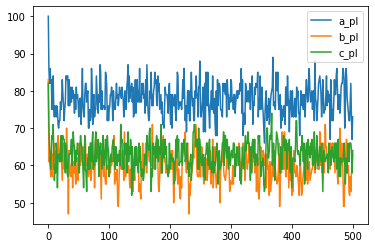

In [67]:
plt.figure()
plt.plot(range(501),a_pl, label="a_pl")
plt.plot(range(501),b_pl, label="b_pl")
plt.plot(range(501),c_pl, label="c_pl")
plt.legend()

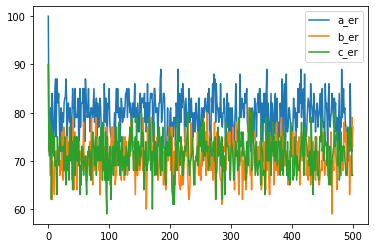

In [65]:
plt.figure()
plt.plot(range(501),a_er, label="a_er")
plt.plot(range(501),b_er, label="b_er")
plt.plot(range(501),c_er, label="c_er")
plt.legend()

### Q4.5
For the Erdos-Renyi graph, on average, RAND and ACC gave similer results, but for the preferencial model graph, the green line is above the orange line frequently so RAND gave us more infected people than ACC.In the Erdos-Renyi graph, edges are generated randomly so there is little difference in terms of the degree among nodes.In the preferential attachment graph, higher-degree nodes have higher chance of getting new edgeds so there is more difference in terms of the degree among the nodes. Therefore, ACC gave less infected people because higher degree nodes are likely to be deleted by ACC.

### Q5

I have two friends, Hasib and Hankyu, in this class. 
I frist tried to know my two-step frinds in the discussion section, but they did not respond. So I directly asked them who their friends were. Hankyu's friends are Sulyun and Hasib, and Hasib's frinds are Hankyu and Avinash. Therefore, my two-step friends are Sulyun and Avinash.